# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from IPython.core.interactiveshell import InteractiveShell
import seaborn as sns
from scipy import stats
from scipy.stats import norm

%matplotlib inline 
InteractiveShell.ast_node_interactivity = "all" 
df = pd.read_csv('data/human_body_temperature.csv')

In [104]:
#overviw of data: inspect data structure, shape, null values and duplicates.
df.head()
df.info()
df.shape
df.isnull().sum()
df[df.duplicated(keep=False)]

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


(130, 3)

temperature    0
gender         0
heart_rate     0
dtype: int64

,temperature,gender,heart_rate
7,98.8,M,78.0
54,98.2,F,73.0
72,98.0,M,78.0
75,98.8,M,78.0
87,98.0,M,78.0
127,98.2,F,73.0


Since this is sample data for an exercise there is no unexpected null data. After looking at the data set, duplicates appear to be coincidence.

# 1. Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold, it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

In [14]:
#compute empiricle mean and standard deviation

#number of samples:
n = len(df['temperature'])

#sample mean:
x_bar = np.mean(df['temperature'])
print('Mean temperature = ', x_bar)

#sample standard deviation
std = np.std(df['temperature'])

print('Standard deviation = +/- ', std, 'degrees fahrenheit')

Mean temperature =  98.24923076923078
Standard deviation = +/-  0.7303577789050377 degrees fahrenheit


In [15]:
#Sample a normal distribution with sample mean and standard deviation with sample size 10,000:
samples_normal = np.random.normal(x_bar, std, size=10000)
print(samples_normal)

[ 99.14924279  98.41875101  98.4556886  ...,  99.09526042  98.69679724
  97.88318934]


In [16]:
# Define a function to compute ECDF with a one-dimensional array:
def ecdf(data):
    
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

<function matplotlib.pyplot.show>

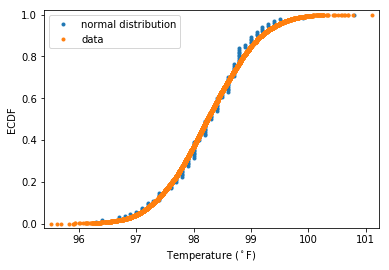

In [17]:
#Plot the ECDFs
x_temp, y_temp = ecdf(df['temperature'])
x_normal, y_normal = ecdf(samples_normal)
_=plt.plot(x_temp, y_temp, marker='.',linestyle='none')
_=plt.plot(x_normal, y_normal, marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('Temperature ($^\circ$F)')
_=plt.ylabel('ECDF')
_=plt.legend(('normal distribution','data'))
plt.show

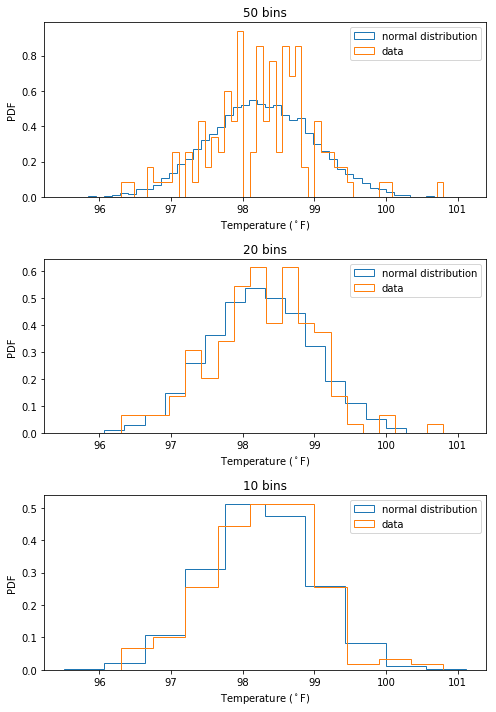

In [18]:
# Plot the PDFs
fig = plt.figure(figsize=(7, 10))
_ = plt.subplot(3,1,1)
_ = plt.hist(samples_normal, bins=50, normed=True, histtype='step')
_ = plt.hist(df['temperature'], bins=50, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.title('50 bins')
_ = plt.legend(('normal distribution', 'data'))

_ = plt.subplot(3,1,2)
_ = plt.hist(samples_normal, bins=20, normed=True, histtype='step')
_ = plt.hist(df['temperature'], bins=20, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.title('20 bins')
_ = plt.legend(('normal distribution', 'data'))

_ = plt.subplot(3,1,3)
_ = plt.hist(samples_normal, bins=10, normed=True, histtype='step')
_ = plt.hist(df['temperature'], bins=10, normed=True, histtype='step')
_ = plt.xlabel('Temperature ($^\circ$F)')
_ = plt.ylabel('PDF')
_ = plt.title('10 bins')
_ = plt.legend(('normal distribution', 'data'))
_ = plt.tight_layout()

* It is evident by using both the ECDF and PDF plots that the data of body temperature is normally distributed.

# 2. Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.

In [19]:
#number of samples:
n = len(df['temperature'])
print(n)

130


* The sample size n = 130 is large (n > 30).

* The observations are independent of one another. Each temperature is taken from a separate person and each temperature is independent from the last observation.

# 3. Is the true population mean really 98.6 degrees F?

First, try a bootstrap hypothesis test. Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why? 

In this situation, is it appropriate to use the  t  or  z  statistic? Now try using the other test. How is the result be different? Why?

* In this test I would use a one-sample test because there is one set of data that we are comparing to a single value.

* Since we have a large sample size but we do not know the population standard deviation it is appropriate to use the t-statistic.

Null Hypothesis: The true population mean is equal to the conventional mean (98.6∘F). H0: μ − 98.6 = 0, α=0.01

Significance level: 99.9% confidence ratio

In [20]:
# One sample t-test:
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.45482329236
p-value: 2.41063204156e-07


In [21]:
# The quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
n = 130
print((stats.t.ppf(q=0.0005, df= n-1)), (stats.t.ppf(q=0.9995, df= n-1)))

-3.36754645418 3.36754645418


* Using this method, the t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level. The p-value is below the significance level of 0.01, so the null hypothesis can be rejected.

* Next lets look at using a z-test. A z-test is not the best fit since we do not know the standard deviation. 
We will approximate it using the standard error of the mean.

In [24]:
# Standard error of the mean:
sem = std/np.sqrt(n)
print(sem)

0.0640566146952


In [25]:
# Z-statistic:
z = (x_bar - 98.6) / sem

# P-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -5.47592520208
p-value: 4.35231516588e-08


* The z-statistic is close to the same value as the t-statistic. The p-value is also very low.

* Another bootstrap test method is to generate many sets of simulated data assuming the null hypothesis is true, then compute the test statistic for each simulated dataset:

In [27]:
def replicate(data, function):
    #Return replicate of a resampled data array.
    
    # Create the resampled array and return the statistic of interest:
    return function(np.random.choice(data, size=len(data)))


def draw_replicates(data, function, size=1):
    #Draw bootstrap replicates.

    # Initialize array of replicates:
    replicates = np.empty(size)

    # Generate replicates:
    for i in range(size):
        replicates[i] = replicate(data, function)

    return replicates

In [29]:
# Seed the random number generator:
np.random.seed(10)


# Make an array of translated temperatures:
translated_temps = df.temperature - x_bar + 98.6

# Draw bootstrap replicates of translated temperatures:
translated_replicates = draw_replicates(translated_temps, np.mean, 10000)

# Compute fraction of replicates that are less than the observed temperature mean:
p = np.sum(translated_replicates <= x_bar) / len(translated_replicates)

# Print the p-value:
print('p-value =', p)

p-value = 0.0


* In the t-test, z-test and using hacker statistics the p-value is significantly less than 0.01, so the null hypothesis is rejected. 
* Therefore there is sufficient evidence to reject the claim that the true population mean is the conventional normal human body temperature of 98.6°F.

#     4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use? What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?

In [40]:
# Seed the random number generator:
np.random.seed(15)


# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(df.temperature, size=10)
sample

array([ 98.4,  97.9,  97.1,  98.7,  98.2,  98.4,  98.2,  98.8,  96.7,  96.4])

In [41]:
# One sample t-test:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.68826445858
p-value: 0.0248671106512


In [42]:
# Z-statistic:
z = (np.mean(sample) - 98.6) / (np.std(sample)/np.sqrt(len(sample)))

# Calculate and save p-value:
p = stats.norm.cdf(z) * 2

# Print the values for z and p:
print('z-statistic:', z)
print('p-value:', p)

z-statistic: -2.83367954733
p-value: 0.0046015450048


In [43]:
# Quantiles of the t-distribution corresponding to confidence level (95%) and degrees of freedom:
print((stats.t.ppf(q=0.025, df=10-1)), (stats.t.ppf(q=0.975, df=10-1)))

-2.26215716274 2.26215716274


In [44]:
# Quantiles of the t-distribution corresponding to confidence level (99.9%) and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=10-1)), (stats.t.ppf(q=0.9995, df=10-1)))

-4.78091258593 4.78091258593


* The null hypothesis using both the z-test statistic and t-test statistic should be rejected with a 95% confidence level but not a 99.9% confidence level.

* The p-value of 0.025 using the t-test is small enough to give evidence to reject the null hypothesis at the 95% confidence level (0.025) but not quite at the 99% confidence level (0.005). The p-value of 0.0046 using the z-test is small enough to give strong evidence to reject the null hypothesis at both confidence levels.


* The difference in results between the t and z tests shows the nature of the two distributions. The t-distribution is wider so there is more variability, making this test less sensitive. 

* Overall the t-test would be the correct test to use in this case with a sample size of less than 30. This gives us a 95% confidence level to reject the null hypothesis.

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [66]:
# 95% prediction interval:
PI = stats.norm.interval(0.95, loc=x_bar, scale=std)
print('95% Prediction Interval:', PI)

95% Prediction Interval: (96.81775582674824, 99.680705711713316)


In [67]:
# Critical value at 95% confidence:
z_critical = norm.ppf(0.975)
z_critical

1.959963984540054

In [102]:
# Margin of error:
moe = z_critical * std
print('Margin of Error:', moe)

# 95% prediction interval:
PI = np.array([x_bar - moe, x_bar + moe])
print('95% Prediction Interval:', PI)

Margin of Error: 1.43147494248
95% Prediction Interval: [ 96.81775583  99.68070571]


* Since a temperature at or below 95°F is considered hypothermia and a temperature at or above 100°F is a fever, temperatures outside the range of 96.82 to 99.68°F would be abnormal.

# 6. Is there a significant difference between males and females in normal temperature?


What testing approach did you use and why?

* A permutation test is best since it exactly simulates the null hypothesis. 
* A two-sample t-test is also works since the means of two independent samples are compared. 
    * Graphical data analysis:

Text(0.5,1,'Distribution of Female & Male Body Temperatures')

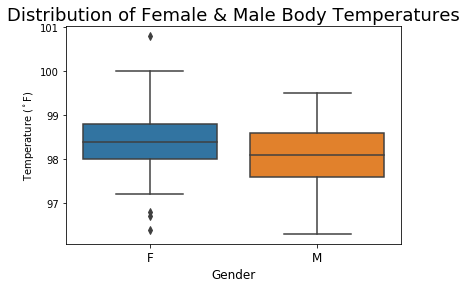

In [106]:
# Create boxplots for temperature by gender:
fig = sns.boxplot(x='gender', y='temperature', data=df)

# Increase tick mark font size, label axes and add title:
plt.tick_params(axis='x', which='major', labelsize=12)
fig = plt.xlabel('Gender', fontsize=12)
fig = plt.ylabel('Temperature ($^\circ$F)')
plt.title('Distribution of Female & Male Body Temperatures', fontsize=18)

# Display the plots:
plt.show()

In [107]:
# Temperatures filtered by gender:
female_temp = df.temperature[df.gender == 'F']
male_temp = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temp)
n_male = len(male_temp)

# Sample Means:
M_female = np.mean(female_temp)
M_male = np.mean(male_temp)

print('Female Sample Size:', n_female, '\nFemale Temperature Mean:', M_female)
print('\nMale Sample Size:', n_male, '\nMale Temperature Mean:', M_male)

Female Sample Size: 65 
Female Temperature Mean: 98.39384615384613

Male Sample Size: 65 
Male Temperature Mean: 98.1046153846154


* Null Hypothesis: There is no significant difference between female and male normal human body temperature.
    
* Significance Level: 95% Confidence

In [113]:
# Permutation functions:

def permutation_sample(data1, data2):

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [110]:
# Random number generator:
np.random.seed(15)


# Difference of means:
empirical_difference = difference_of_means(female_temp, male_temp)

# 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(female_temp, male_temp, difference_of_means, size=10000)

# Fraction of replicates greater than the observed difference of means:
p = np.sum(permutation_replicates >= empirical_difference) / len(permutation_replicates)

# Print the results:
print('Difference of Means', empirical_difference)
print('p-value =', p)

Difference of Means 0.289230769230727
p-value = 0.013


The null hypothesis is rejected with a p-value of 0.013.

In [114]:
# Results of a two sample t-test:
t = stats.ttest_ind(female_temp, male_temp)[0]
p = stats.ttest_ind(female_temp, male_temp)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: 2.28543453817
p-value: 0.0239318831224


In [115]:
# The quantiles of the t-distribution corresponding to confidence level and degrees of freedom:
print((stats.t.ppf(q=0.025, df=65-1)), (stats.t.ppf(q=0.975, df=65-1)))

-1.99772965363 1.99772965363


* A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024. The null hypothesis here is also rejected.

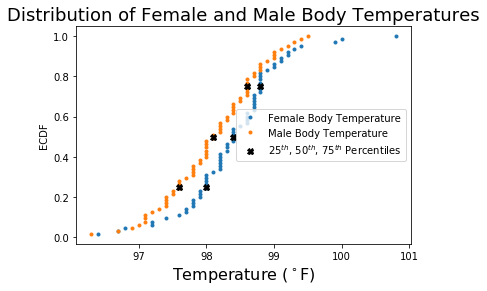

In [120]:
# Compute percentiles:
percentile = np.array([25,50,75])
f_percentiles = np.percentile(df.temperature[df.gender == 'F'], percentile)
m_percentiles = np.percentile(df.temperature[df.gender == 'M'], percentile)

# Compute ECDFs:
fx_temp, fy_temp = ecdf(df.temperature[df.gender == 'F'])
mx_temp, my_temp = ecdf(df.temperature[df.gender == 'M'])

# Plot both ECDFs on the same plot:
fig = plt.plot(fx_temp, fy_temp, marker='.', linestyle='none')
fig = plt.plot(mx_temp, my_temp, marker='.', linestyle='none')

# Overlay percentiles on each plot:
fig = plt.plot(f_percentiles, percentile/100, marker='X', linestyle='none', color='black')
fig = plt.plot(m_percentiles, percentile/100, marker='X', linestyle='none', color='black')

# Label axes and add legend and a title:
fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=16)
fig = plt.ylabel('ECDF')
fig = plt.legend(('Female Body Temperature', 'Male Body Temperature', '25$^{th}$, 50$^{th}$, 75$^{th}$ Percentiles'), loc='center right')
fig = plt.title('Distribution of Female and Male Body Temperatures', fontsize=18)

# Save and display the plots:
plt.show()

# Write a story with your conclusion in the context of the original problem.

* Is the distribution of heart rates normal?

In [122]:
#compute empiricle mean and standard deviation

#number of samples:
n = len(df['heart_rate'])

#sample mean:
M = np.mean(df['heart_rate'])
print('Mean heart rate = ', M)

#sample standard deviation
std = np.std(df['heart_rate'])

print('Standard deviation = +/- ', std, 'beats per minute')

Mean heart rate =  73.76153846153846
Standard deviation = +/-  7.034862467797676 beats per minute


In [127]:
#Sample a normal distribution with sample mean and standard deviation with sample size 10,000:
samples_normal2 = np.random.normal(M, std, size=10000)
print(samples_normal2)

[ 77.4065412   78.37738312  74.00137403 ...,  76.35596368  75.72277839
  68.7187832 ]


In [124]:
# Define a function to compute ECDF with a one-dimensional array:
def ecdf(data):
    
    # Number of data points: n
    n = len(data)
    
    # x-data for the ECDF: x
    x = np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

<function matplotlib.pyplot.show>

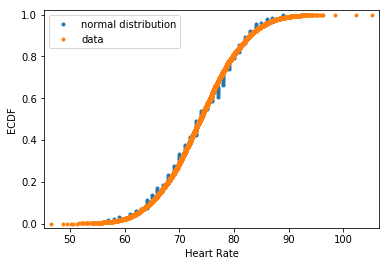

In [128]:
#Plot the ECDFs
x_temp, y_temp = ecdf(df['heart_rate'])
x_normal, y_normal = ecdf(samples_normal2)
_=plt.plot(x_temp, y_temp, marker='.',linestyle='none')
_=plt.plot(x_normal, y_normal, marker='.',linestyle='none')
plt.margins(0.02)
_=plt.xlabel('Heart Rate')
_=plt.ylabel('ECDF')
_=plt.legend(('normal distribution','data'))
plt.show

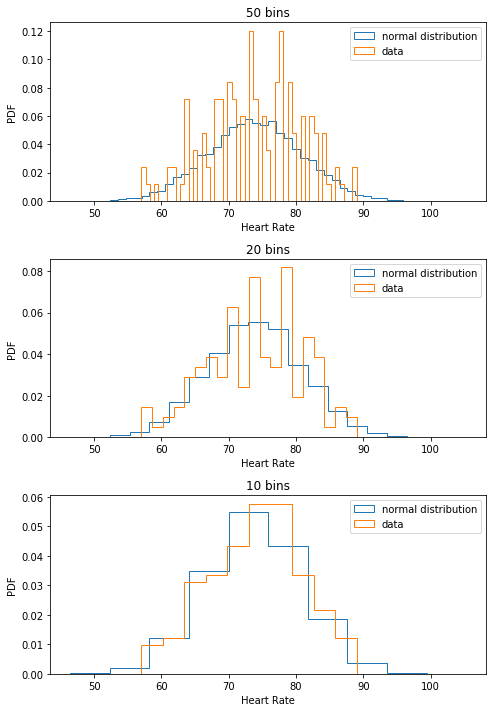

In [130]:
# Plot the PDFs
fig = plt.figure(figsize=(7, 10))
_ = plt.subplot(3,1,1)
_ = plt.hist(samples_normal2, bins=50, normed=True, histtype='step')
_ = plt.hist(df['heart_rate'], bins=50, normed=True, histtype='step')
_ = plt.xlabel('Heart Rate')
_ = plt.ylabel('PDF')
_ = plt.title('50 bins')
_ = plt.legend(('normal distribution', 'data'))

_ = plt.subplot(3,1,2)
_ = plt.hist(samples_normal2, bins=20, normed=True, histtype='step')
_ = plt.hist(df['heart_rate'], bins=20, normed=True, histtype='step')
_ = plt.xlabel('Heart Rate')
_ = plt.ylabel('PDF')
_ = plt.title('20 bins')
_ = plt.legend(('normal distribution', 'data'))

_ = plt.subplot(3,1,3)
_ = plt.hist(samples_normal2, bins=10, normed=True, histtype='step')
_ = plt.hist(df['heart_rate'], bins=10, normed=True, histtype='step')
_ = plt.xlabel('Heart Rate')
_ = plt.ylabel('PDF')
_ = plt.title('10 bins')
_ = plt.legend(('normal distribution', 'data'))
_ = plt.tight_layout()

* It is evident by using both the ECDF and PDF plots that the data of heart rates is normally distributed.

* Is there a relationship between heart rate & temperature?

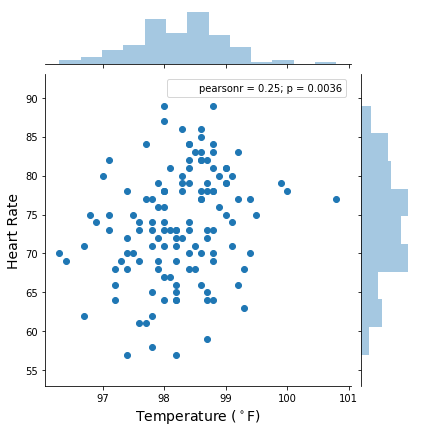

In [132]:
# Figure with a joint plot of temperature and heart rate:
fig = sns.jointplot(df.temperature, df.heart_rate)

plt.margins(0.125)

fig.set_axis_labels('Temperature ($^\circ$F)', 'Heart Rate', fontsize=14)

plt.show()

* There is a correlation of 0.25 (p = 0.004).

In [134]:
#Pearson Correlation Coefficient
def pearson_r(x, y):
    
    # Correlation matrix:
    correlation_matrix = np.corrcoef(x, y)

    # Return entry [0,1]:
    return correlation_matrix[0,1]

In [135]:
# Random number generator:
np.random.seed(15)


# Empirical correlation:
r = pearson_r(df.temperature, df.heart_rate)

# Initialize array of permutation replicates:
permutation_replicates = np.empty(10000)

# Replicates:
for i in range(len(permutation_replicates)):
    temperature_permuted = np.random.permutation(df.temperature)

    # Pearson correlation:
    permutation_replicates[i] = pearson_r(temperature_permuted, df.heart_rate)

# P-value:
p = np.sum(permutation_replicates >= r) / len(permutation_replicates)

# Print the results:
print('Correlation:', r)
print('p-value =', p)

Correlation: 0.253656402721
p-value = 0.0019


 * Both p-values 0.004 or 0.002 reject the null hypothesis that there is no relationship between heart rate and temperature. There is a positive correlation.

In [136]:
# Linear regression:
a, b = np.polyfit(df.temperature, df.heart_rate, 1)

# Slope and intercept:
print('Slope:', a, 'Intercept:', b)

Slope: 2.44323803861 Intercept: -166.284719418


* Linear regression returned a slope of 2.44 and an intercept of -166.3. 
* Theoretically, heart rate can be determined from temperature using this formula:
    Heart Rate = 2.44×∘F − 166.3

In [138]:
# Theoretical data with the same slope and intercept:
x = np.array([df.temperature.min()-1, df.temperature.max()+1])
y = a*x + b

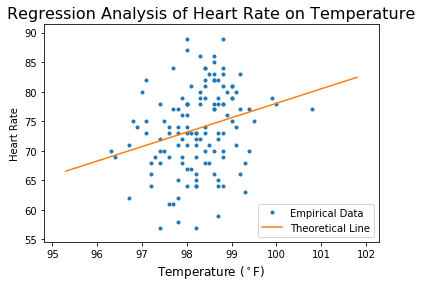

In [141]:
# Empirical data and theoretical linear regression:
fig = plt.plot(df.temperature, df.heart_rate, marker='.', linestyle='none')
fig = plt.plot(x, y)

plt.margins(0.075)

fig = plt.xlabel('Temperature ($^\circ$F)', fontsize=12)
fig = plt.ylabel('Heart Rate')
fig = plt.legend(('Empirical Data', 'Theoretical Line'), loc='lower right')
fig = plt.title('Regression Analysis of Heart Rate on Temperature', fontsize=16)

# Display the plots:
plt.show()

* There appears to be a positive correlation between heart rate and body temperature.